In [2]:
# watch this: https://www.youtube.com/watch?v=iFTWM7HV2UI
# your cleaned data after you complete this analysis: 
# upload to: https://docs.google.com/forms/d/e/1FAIpQLScVuy4aSiSSpLfUOxbmutWtcUidfkzPDc-C0J2gy6Y8TXqeHQ/viewform

import pandas as pd

import matplotlib
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('history_cleaned.csv')
df.shape

(2133, 2)

In [4]:
df.head()


,Time,domain
0,2021-11-08 15:47:18,mail.google.com
1,2021-11-09 20:01:09,mail.google.com
2,2021-11-09 20:11:51,mail.google.com
3,2021-11-09 20:16:16,www.google.com
4,2021-11-09 20:16:21,www.yesstyle.com


In [5]:
df.tail()


,Time,domain
2128,2022-04-16 19:47:10,www.google.com
2129,2022-04-16 19:47:13,www.pinterest.com
2130,2022-04-16 19:47:24,www.google.com
2131,2022-04-16 19:47:26,www.pinterest.com
2132,2022-04-16 19:47:31,accounts.google.com


In [6]:
df.isna().sum()

Time      0
domain    0
dtype: int64

In [7]:
df.dropna( inplace=True)

In [8]:
# time column is string and string date is starting with YYYY, so I can do string compares
sum(df['Time'] < '1900') 


0

In [9]:
# I filter and get a copy, so I will not work on a slice, this will be a new dataframe. (essentially losing 1900 data points)
df = df[df.Time > '1900'].copy() 

In [10]:
df['Time'] = pd.to_datetime(df['Time'])

In [11]:
df.dtypes

Time      datetime64[ns]
domain            object
dtype: object

In [12]:
df.head()

,Time,domain
0,2021-11-08 15:47:18,mail.google.com
1,2021-11-09 20:01:09,mail.google.com
2,2021-11-09 20:11:51,mail.google.com
3,2021-11-09 20:16:16,www.google.com
4,2021-11-09 20:16:21,www.yesstyle.com


In [13]:
df['domain'].value_counts()[:50]

www.google.com                    1162
webauth.umbc.edu                   101
us.shein.com                        94
my.umbc.edu                         55
csprd-web.ps.umbc.edu               47
stackoverflow.com                   37
www.geeksforgeeks.org               24
www.etsy.com                        20
github.com                          19
accounts.google.com                 19
umbc.webex.com                      19
faker.readthedocs.io                17
www.farmrio.com                     16
login.docker.com                    16
www.pdbmbook.com                    15
blackboard.umbc.edu                 15
www.viki.com                        14
adobeid-na1.services.adobe.com      14
tesla.avature.net                   13
www.chegg.com                       13
www.youtube.com                     12
mx.gearbest.com                     10
www.superdry.com                    10
www.scener.com                      10
www.tandfonline.com                  9
www.apartments.com       

Google has a exceptionally large number, which also means that I am a curious person and likes to google and find out about everything. 
Due to the high number of google, I would like to not consider it.

In [14]:
df['domain'].value_counts()[1:50]

webauth.umbc.edu                  101
us.shein.com                       94
my.umbc.edu                        55
csprd-web.ps.umbc.edu              47
stackoverflow.com                  37
www.geeksforgeeks.org              24
www.etsy.com                       20
github.com                         19
accounts.google.com                19
umbc.webex.com                     19
faker.readthedocs.io               17
www.farmrio.com                    16
login.docker.com                   16
www.pdbmbook.com                   15
blackboard.umbc.edu                15
www.viki.com                       14
adobeid-na1.services.adobe.com     14
tesla.avature.net                  13
www.chegg.com                      13
www.youtube.com                    12
mx.gearbest.com                    10
www.superdry.com                   10
www.scener.com                     10
www.tandfonline.com                 9
www.apartments.com                  9
data.cdc.gov                        8
www.walmart.

<AxesSubplot:>

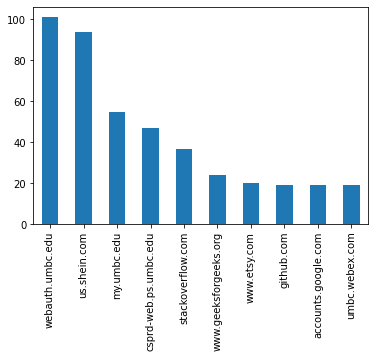

In [15]:
# top 10 sites that I visisted
df['domain'].value_counts()[1:11].plot(kind='bar')

In [16]:
hourly_counts = df.groupby(df.Time.dt.hour).domain.size()
hourly_counts

Time
0     107
1      82
2      54
3       4
8      19
10     42
11     59
12     84
13    105
14    173
15    119
16    200
17    198
18    115
19    143
20    239
21    198
22    108
23     84
Name: domain, dtype: int64

<AxesSubplot:xlabel='Time'>

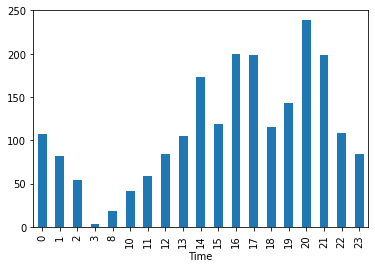

In [17]:
hourly_counts.plot.bar()

In [18]:
df['Day'] = [ d.day_name() for d in df['Time']]
df['DayIndex'] = [ d.dayofweek for d in df['Time']]
df.head()

,Time,domain,Day,DayIndex
0,2021-11-08 15:47:18,mail.google.com,Monday,0
1,2021-11-09 20:01:09,mail.google.com,Tuesday,1
2,2021-11-09 20:11:51,mail.google.com,Tuesday,1
3,2021-11-09 20:16:16,www.google.com,Tuesday,1
4,2021-11-09 20:16:21,www.yesstyle.com,Tuesday,1


In [19]:
df['Day'].value_counts()

Wednesday    422
Saturday     389
Monday       376
Sunday       302
Thursday     249
Tuesday      245
Friday       150
Name: Day, dtype: int64

In [20]:
days_sorted = df['DayIndex'].value_counts().sort_index()
days_sorted

0    376
1    245
2    422
3    249
4    150
5    389
6    302
Name: DayIndex, dtype: int64

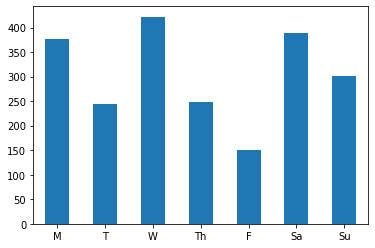

In [21]:
days_sorted.plot.bar()
plt.xticks(days_sorted.index, ['M', 'T', 'W','Th', 'F', 'Sa', 'Su'], rotation=0)

plt.show()

In [22]:
#most used domains on wednesdays
list = df.loc[df['Day'] == 'Wednesday', 'domain']
#list.value_counts()[:10]

<AxesSubplot:>

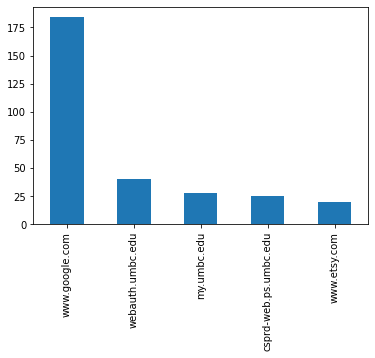

In [23]:
list = list.value_counts()[0:5]
list.plot.bar()

In [24]:
def is_weekend(day): 
    return day in ['Saturday', 'Sunday']


df['isWeekend'] = [ is_weekend(i) for i in df['Day']]
df.head()



,Time,domain,Day,DayIndex,isWeekend
0,2021-11-08 15:47:18,mail.google.com,Monday,0,False
1,2021-11-09 20:01:09,mail.google.com,Tuesday,1,False
2,2021-11-09 20:11:51,mail.google.com,Tuesday,1,False
3,2021-11-09 20:16:16,www.google.com,Tuesday,1,False
4,2021-11-09 20:16:21,www.yesstyle.com,Tuesday,1,False


In [25]:
weekend = df[ df['isWeekend'] == True ]

weekday = df[ df['isWeekend'] == False ]

In [26]:
weekend.head()

,Time,domain,Day,DayIndex,isWeekend
195,2022-01-23 17:30:57,www.google.com,Sunday,6,True
196,2022-01-23 17:31:15,www.viki.com,Sunday,6,True
197,2022-01-23 17:31:57,www.viki.com,Sunday,6,True
198,2022-01-23 17:31:57,www.viki.com,Sunday,6,True
199,2022-01-23 17:32:05,www.viki.com,Sunday,6,True


In [27]:
weekday['domain'].value_counts()[:5]

www.google.com           649
webauth.umbc.edu         101
us.shein.com              93
my.umbc.edu               55
csprd-web.ps.umbc.edu     47
Name: domain, dtype: int64

In [28]:
weekend['domain'].value_counts()[:5]

www.google.com           513
stackoverflow.com         19
faker.readthedocs.io      17
www.farmrio.com           16
www.geeksforgeeks.org     15
Name: domain, dtype: int64

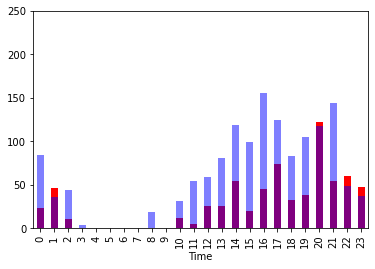

In [29]:
def show_stats(df, color, alpha=1):
    hourly_counts = df.groupby(df.Time.dt.hour).domain.size()
    
    # fill in the missing hours
    for h in range(24):
        if h not in hourly_counts:
            hourly_counts[h]=0 # I initially didn't do this and hours were not lining up
            
    hourly_counts.sort_index().plot.bar(color=color, alpha=alpha)
    plt.ylim([0, 250])

    
show_stats(weekend, 'red', 1)
    
show_stats(weekday, 'blue', 0.5)

In [30]:
# be skeptical about your data!
# am I on computer a lot more on the weekdays 
# or it shows more simply becasue there are more weekdays 

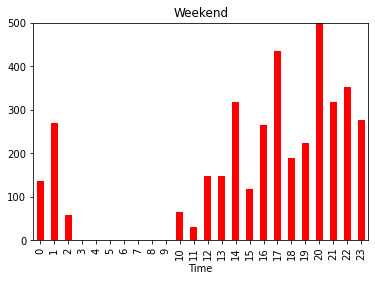

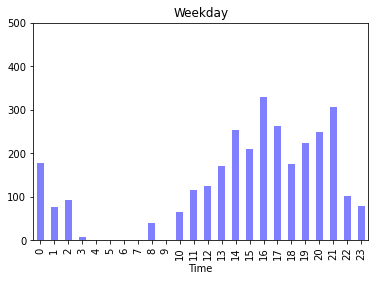

In [31]:
def show_stats(df, color, alpha=1, title='', y_lim = None):
    hourly_counts = df.groupby(df.Time.dt.hour).domain.size()
    
    days_counts = df.Time.dt.date.nunique()
    
    # fill in the missing hours
    for h in range(24):
        if h not in hourly_counts:
            hourly_counts[h]=0 # I initially didn't do this and hours were not lining up
        else: 
            hourly_counts[h] = hourly_counts[h] * 100.0 /  days_counts # I multiplied by 100.0 to make it float and also not to loose decimals
            
    hourly_counts.sort_index().plot.bar(color=color, alpha=alpha, title=title)
    
    if y_lim != None:
        plt.ylim(y_lim)
    plt.show()


    
y_lim=[0, 500]
show_stats(weekend, 'red', 1, 'Weekend', y_lim=y_lim)
    
show_stats(weekday, 'blue', 0.5, 'Weekday', y_lim=y_lim)

In [32]:
df['domain'].value_counts()[:50]

www.google.com                    1162
webauth.umbc.edu                   101
us.shein.com                        94
my.umbc.edu                         55
csprd-web.ps.umbc.edu               47
stackoverflow.com                   37
www.geeksforgeeks.org               24
www.etsy.com                        20
github.com                          19
accounts.google.com                 19
umbc.webex.com                      19
faker.readthedocs.io                17
www.farmrio.com                     16
login.docker.com                    16
www.pdbmbook.com                    15
blackboard.umbc.edu                 15
www.viki.com                        14
adobeid-na1.services.adobe.com      14
tesla.avature.net                   13
www.chegg.com                       13
www.youtube.com                     12
mx.gearbest.com                     10
www.superdry.com                    10
www.scener.com                      10
www.tandfonline.com                  9
www.apartments.com       

In [33]:
df['domain'] = df['domain'].astype(str)

In [34]:
def get_data_for_domain(val):
    return df[ [True if val.lower() in i.lower() else False for i in df['domain'] ]]


def show_domain_stats(domain, color='blue', alpha=1):
    data = get_data_for_domain(domain)
    show_stats(data, color, alpha)
    return data

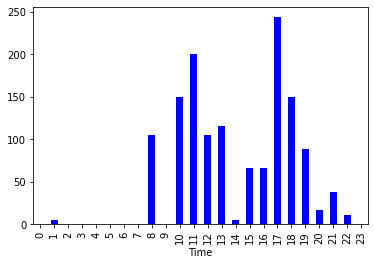

In [35]:
_= show_domain_stats('umbc', 'blue')

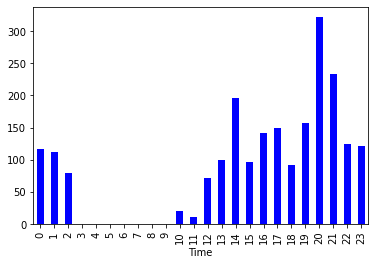

In [36]:
_= show_domain_stats('www.google.com', 'blue')

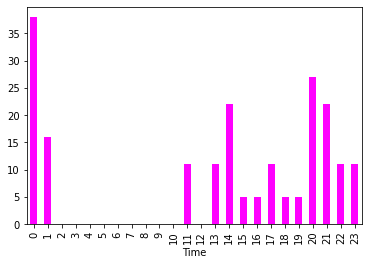

In [37]:
_ = show_domain_stats('stackover', 'magenta')

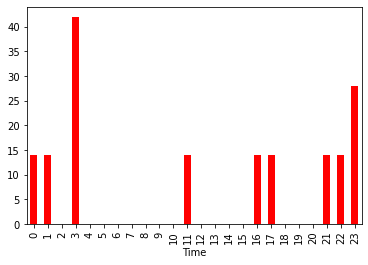

In [38]:
_ = show_domain_stats('youtube', 'red')

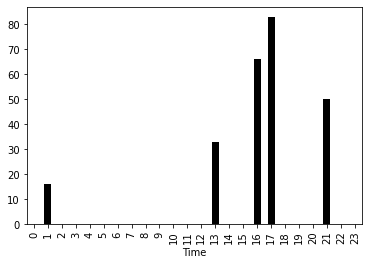

In [39]:
_=show_domain_stats('blackboard', 'black')

### Based on data, what can we tell about this person?

1. Is this a work computer/personal computer?


2. Is he employed?


3. What is his interests?


4. Anything interesting?

answer here

1. The Browsing History seems like it is of a student from UMBC. It also seems like it is a personal computer.
2. Probably not, because the browsing history seems more like that of a student
3. It is mostly the academic intrests, apart from that the user likes to watch youtube and has a shopping habbit.
4. It can also be estimated that the user might have not used chrome for most of their activities except for academic purposes and shopping purposes. The user chrome for the purpose of google.


#### What do you think about this assignment?


The is a great example for any student learning data visualization. This also helped me make good sense of the whole purpose. This also gave me a better insight on how metadata can be analysed and visualized in order to understand a users browsing habits and lifestyle as a whole. 